<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratch

In [ ]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """

        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """

        pass
        return

# Problem 1 - Function for finding impurness

In [ ]:
def gini_impurity(class_counts):
    total = sum(class_counts)
    if total == 0:
        return 0.0  # No samples at the node = pure
    impurity = 1.0
    for count in class_counts:
        prob = count / total
        impurity -= prob ** 2
    return impurity

examples = {
    "Example 1 (15,15)": [15, 15],
    "Example 2 (15,15,15)": [15, 15, 15],
    "Example 3 (18,12)": [18, 12],
    "Example 4 (30,0)": [30, 0],
}

for desc, counts in examples.items():
    print(f"{desc}: Gini Impurity = {gini_impurity(counts):.3f}")


# Problem 2 - Function for finding information gain

In [ ]:
def information_gain(parent_counts, left_counts, right_counts):
    def gini_impurity(counts):
        total = sum(counts)
        if total == 0:
            return 0.0
        probs = [c / total for c in counts]
        return 1 - sum(p**2 for p in probs)

    total_samples = sum(parent_counts)
    left_total = sum(left_counts)
    right_total = sum(right_counts)

    gini_parent = gini_impurity(parent_counts)
    gini_left = gini_impurity(left_counts)
    gini_right = gini_impurity(right_counts)

    weighted_gini = (left_total / total_samples) * gini_left + (right_total / total_samples) * gini_right
    info_gain = gini_parent - weighted_gini
    return info_gain


# Problem 3 - Learning

In [ ]:
def fit(self, X, y):
    n_samples, n_features = X.shape
    best_info_gain = -1  # Starting with worst possible
    best_split = {}

    # Total class counts at parent node
    parent_counts = np.bincount(y)

    for feature_idx in range(n_features):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            left_indices = X[:, feature_idx] <= threshold
            right_indices = X[:, feature_idx] > threshold

            y_left = y[left_indices]
            y_right = y[right_indices]

            # Counting class occurrences in each split
            left_counts = np.bincount(y_left, minlength=len(parent_counts))
            right_counts = np.bincount(y_right, minlength=len(parent_counts))

            # Calculating info gain
            ig = information_gain(parent_counts, left_counts, right_counts)

            if ig > best_info_gain:
                best_info_gain = ig
                best_split = {
                    "feature": feature_idx,
                    "threshold": threshold,
                    "left_class": Counter(y_left).most_common(1)[0][0] if len(y_left) > 0 else None,
                    "right_class": Counter(y_right).most_common(1)[0][0] if len(y_right) > 0 else None
                }

    # Save best split info into self
    self.best_feature = best_split["feature"]
    self.best_threshold = best_split["threshold"]
    self.left_class = best_split["left_class"]
    self.right_class = best_split["right_class"]

    if self.verbose:
        print(f"Best Feature: {self.best_feature}")
        print(f"Best Threshold: {self.best_threshold}")
        print(f"Left Class: {self.left_class}")
        print(f"Right Class: {self.right_class}")
        print(f"Information Gain: {best_info_gain:.4f}")


# Problem 4 - Estimate

In [ ]:
def predict(self, X):
    predictions = []
    for sample in X:
        value = sample[self.best_feature]
        if self.verbose:
            print(f"Feature {self.best_feature} value = {value}, threshold = {self.best_threshold}")
        if value <= self.best_threshold:
            predictions.append(self.left_class)
        else:
            predictions.append(self.right_class)
    return np.array(predictions)


# New Scratch code with all implementations

In [9]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def gini(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1.0 - np.sum(probabilities ** 2)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class ScratchDecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=10, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            # No split possible..: make leaf
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)

        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_gini = gini(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        gini_left, gini_right = gini(y[left_idxs]), gini(y[right_idxs])

        child_gini = (n_l / n) * gini_left + (n_r / n) * gini_right
        ig = parent_gini - child_gini
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


# Problem 5 - Learning and Estimation

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset (3 classes)
iris = load_iris()
X, y = iris.data, iris.target

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and train scratch tree
model = ScratchDecisionTreeClassifier(max_depth=5, min_samples_split=5, n_feats=2)
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Scratch Decision Tree performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Scratch Decision Tree performance:
Accuracy: 0.9777777777777777
Precision (macro): 0.9761904761904763
Recall (macro): 0.9743589743589745
F1 Score (macro): 0.974320987654321


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

print("\nScikit-learn Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision (macro):", precision_score(y_test, y_pred_sklearn, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_sklearn, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_sklearn, average='macro'))


Scikit-learn Decision Tree Results:
Accuracy: 0.7111111111111111
Precision (macro): 0.5
Recall (macro): 0.6666666666666666
F1 Score (macro): 0.5555555555555555


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Problem 6 - Visualizing

In [19]:
import numpy as np
from collections import Counter

class TreeNode:
    def __init__(self, depth=0, max_depth=3, min_samples_split=2):
        """
        Initialize a tree node.

        Parameters:
        - depth: current depth of the node
        - max_depth: maximum allowed depth for recursion
        - min_samples_split: minimum samples needed to split
        """
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def fit(self, X, y):
        """
        Recursively fit the tree node.
        """
        n_samples, n_features = X.shape
        num_classes = len(np.unique(y))

        # Stop conditions
        if (self.depth >= self.max_depth or n_samples < self.min_samples_split or num_classes == 1):
            # Assign leaf node value by majority class
            self.value = self._most_common_label(y)
            return

        # Finding the best split
        best_gain = -1
        best_feat = None
        best_thresh = None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature_index, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feat = feature_index
                    best_thresh = threshold

        # If no gain, make leaf node
        if best_gain == 0:
            self.value = self._most_common_label(y)
            return

        # Saving best split
        self.feature_index = best_feat
        self.threshold = best_thresh

        # Spliting data
        left_indices = X[:, best_feat] <= best_thresh
        right_indices = X[:, best_feat] > best_thresh

        # Create child nodes and recurse
        self.left = TreeNode(depth=self.depth + 1,
                             max_depth=self.max_depth,
                             min_samples_split=self.min_samples_split)
        self.left.fit(X[left_indices], y[left_indices])

        self.right = TreeNode(depth=self.depth + 1,
                              max_depth=self.max_depth,
                              min_samples_split=self.min_samples_split)
        self.right.fit(X[right_indices], y[right_indices])

    def predict(self, X):
        """
        Predict class for each sample in X.
        """
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        """
        Helper method to predict a single sample.
        """
        if self.value is not None:
            return self.value

        if x[self.feature_index] <= self.threshold:
            return self.left._predict_single(x)
        else:
            return self.right._predict_single(x)

    def _most_common_label(self, y):
        """
        Return the most common class label from y.
        """
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def _gini(self, y):
        """
        Compute Gini impurity for labels y.
        """
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _information_gain(self, X, y, feature_index, threshold):
        """
        Compute information gain from splitting y by threshold on feature_index.
        """
        parent_gini = self._gini(y)

        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold

        if sum(left_indices) == 0 or sum(right_indices) == 0:
            return 0

        n = len(y)
        n_left, n_right = sum(left_indices), sum(right_indices)

        gini_left = self._gini(y[left_indices])
        gini_right = self._gini(y[right_indices])

        child_gini = (n_left / n) * gini_left + (n_right / n) * gini_right

        return parent_gini - child_gini


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=0
)

# Initializing tree and fitting
tree = TreeNode(max_depth=3, min_samples_split=5)
tree.fit(X_train, y_train)

# Predictions
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

# Metrics on training data
print("Train accuracy:", accuracy_score(y_train, train_pred))
print("Train precision (macro):", precision_score(y_train, train_pred, average='macro'))
print("Train recall (macro):", recall_score(y_train, train_pred, average='macro'))
print("Train f1 (macro):", f1_score(y_train, train_pred, average='macro'))



Train accuracy: 0.9809523809523809
Train precision (macro): 0.983739837398374
Train recall (macro): 0.9791666666666666
Train f1 (macro): 0.9809139784946237


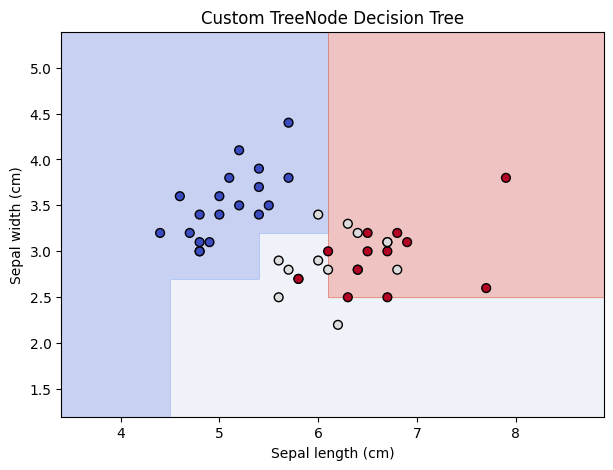

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initializing and fitting
tree = TreeNode(max_depth=3, min_samples_split=5)
tree.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # visualizing decision regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # dots
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)

    ax.set_xlabel("Sepal length (cm)")
    ax.set_ylabel("Sepal width (cm)")
    ax.set_title(title)

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
plot_decision_boundary(tree, X_test, y_test, ax, "Custom TreeNode Decision Tree")

plt.show()


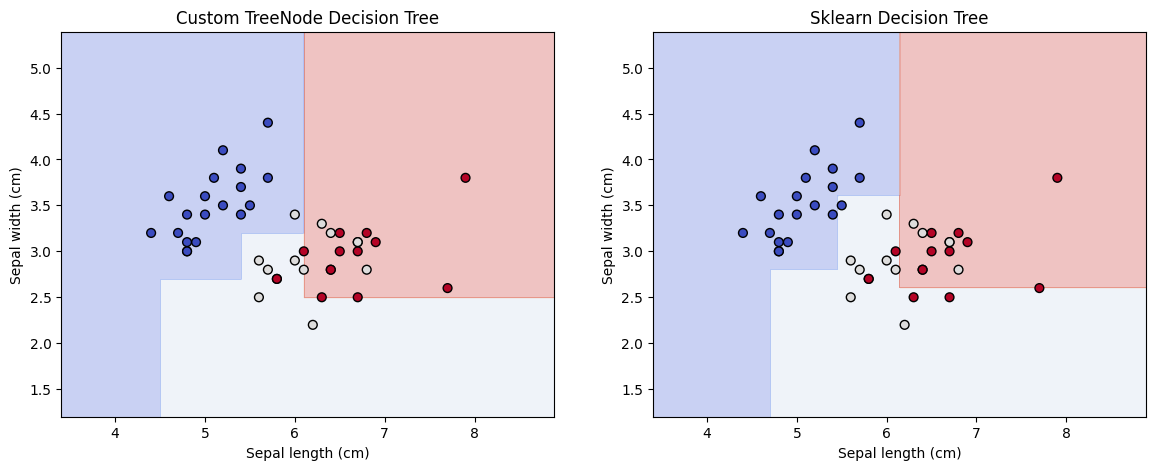

In [22]:
from sklearn.tree import DecisionTreeClassifier

sklearn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_tree.fit(X_train, y_train)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
plot_decision_boundary(tree, X_test, y_test, axs[0], "Custom TreeNode Decision Tree")
plot_decision_boundary(sklearn_tree, X_test, y_test, axs[1], "Sklearn Decision Tree")

plt.show()


# Problem 7 - Advanced Depth of 2

In [23]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, depth=0, max_depth=2):
        self.depth = depth
        self.max_depth = max_depth

        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def is_leaf_node(self):
        return self.value is not None

class ScratchDecisionTreeClassifierDepth2:
    def __init__(self):
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        # Stop conditions: max depth reached or pure node
        if depth == 2 or num_labels == 1 or num_samples == 0:
            leaf_value = self._most_common_label(y)
            leaf_node = Node(depth=depth)
            leaf_node.value = leaf_value
            return leaf_node

        # Find best split
        best_feat, best_thresh = self._best_criteria(X, y)

        # If no split found, make leaf
        if best_feat is None:
            leaf_value = self._most_common_label(y)
            leaf_node = Node(depth=depth)
            leaf_node.value = leaf_value
            return leaf_node

        # Create node and split data recursively
        node = Node(depth=depth)
        node.feature_index = best_feat
        node.threshold = best_thresh

        left_indices = X[:, best_feat] <= best_thresh
        right_indices = X[:, best_feat] > best_thresh

        node.left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        node.right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return node

    def _best_criteria(self, X, y):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature_index, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, X, y, feature_index, threshold):
        parent_gini = self._gini(y)

        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold

        if sum(left_indices) == 0 or sum(right_indices) == 0:
            return 0

        n = len(y)
        n_left = sum(left_indices)
        n_right = sum(right_indices)

        gini_left = self._gini(y[left_indices])
        gini_right = self._gini(y[right_indices])

        weighted_gini = (n_left / n) * gini_left + (n_right / n) * gini_right

        return parent_gini - weighted_gini

    def _gini(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)


In [24]:
# Initializing and training
model = ScratchDecisionTreeClassifierDepth2()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.7555555555555555
Precision (macro): 0.7434640522875817
Recall (macro): 0.7422402159244265
F1 Score (macro): 0.7358730158730159


# Problem 8 - Unlimited Depth

In [26]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, depth=0):
        self.depth = depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def is_leaf_node(self):
        return self.value is not None

class ScratchDecisionTreeClassifierDepthInf:
    def __init__(self, max_depth=None, verbose=False):
        """
        Parameters:
        - max_depth: int or None (None means unlimited)
        - verbose: bool to print training steps
        """
        self.max_depth = max_depth
        self.verbose = verbose
        self.root = None

    def fit(self, X, y):
        if self.verbose:
            print(f"Starting training with max_depth={self.max_depth}")
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        num_labels = len(np.unique(y))

        if self.verbose:
            print(f"{'|   ' * depth}Depth {depth}: {n_samples} samples, {num_labels} unique labels")

        # Stop if pure node, max depth reached or no samples
        if num_labels == 1:
            leaf_value = y[0]
            if self.verbose:
                print(f"{'|   ' * depth}Pure node found with class {leaf_value}")
            leaf_node = Node(depth=depth)
            leaf_node.value = leaf_value
            return leaf_node

        if self.max_depth is not None and depth >= self.max_depth:
            leaf_value = self._most_common_label(y)
            if self.verbose:
                print(f"{'|   ' * depth}Max depth reached, assigning class {leaf_value}")
            leaf_node = Node(depth=depth)
            leaf_node.value = leaf_value
            return leaf_node

        if n_samples == 0:
            if self.verbose:
                print(f"{'|   ' * depth}No samples, returning None")
            return None

        best_feat, best_thresh, best_gain = self._best_criteria(X, y)

        if best_gain == 0 or best_feat is None:
            leaf_value = self._most_common_label(y)
            if self.verbose:
                print(f"{'|   ' * depth}No gain from split, assigning class {leaf_value}")
            leaf_node = Node(depth=depth)
            leaf_node.value = leaf_value
            return leaf_node

        node = Node(depth=depth)
        node.feature_index = best_feat
        node.threshold = best_thresh

        if self.verbose:
            print(f"{'|   ' * depth}Splitting: feature {best_feat} at threshold {best_thresh:.4f} with gain {best_gain:.4f}")

        left_indices = X[:, best_feat] <= best_thresh
        right_indices = X[:, best_feat] > best_thresh

        node.left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        node.right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return node

    def _best_criteria(self, X, y):
        best_gain = 0
        split_idx, split_thresh = None, None
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature_index, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_thresh = threshold
        return split_idx, split_thresh, best_gain

    def _information_gain(self, X, y, feature_index, threshold):
        parent_gini = self._gini(y)

        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold

        if sum(left_indices) == 0 or sum(right_indices) == 0:
            return 0

        n = len(y)
        n_left = sum(left_indices)
        n_right = sum(right_indices)

        gini_left = self._gini(y[left_indices])
        gini_right = self._gini(y[right_indices])

        weighted_gini = (n_left / n) * gini_left + (n_right / n) * gini_right

        return parent_gini - weighted_gini

    def _gini(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)


In [27]:
# Example usage with iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

model = ScratchDecisionTreeClassifierDepthInf(max_depth=None, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Starting training with max_depth=None
Depth 0: 105 samples, 3 unique labels
Splitting: feature 2 at threshold 1.9000 with gain 0.3121
|   Depth 1: 31 samples, 1 unique labels
|   Pure node found with class 0
|   Depth 1: 74 samples, 2 unique labels
|   Splitting: feature 2 at threshold 4.7000 with gain 0.3551
|   |   Depth 2: 33 samples, 2 unique labels
|   |   Splitting: feature 3 at threshold 1.5000 with gain 0.0588
|   |   |   Depth 3: 32 samples, 1 unique labels
|   |   |   Pure node found with class 1
|   |   |   Depth 3: 1 samples, 1 unique labels
|   |   |   Pure node found with class 2
|   |   Depth 2: 41 samples, 2 unique labels
|   |   Splitting: feature 3 at threshold 1.7000 with gain 0.0693
|   |   |   Depth 3: 8 samples, 2 unique labels
|   |   |   Splitting: feature 2 at threshold 4.9000 with gain 0.1667
|   |   |   |   Depth 4: 2 samples, 1 unique labels
|   |   |   |   Pure node found with class 1
|   |   |   |   Depth 4: 6 samples, 2 unique labels
|   |   |   |   Split